[WhisperX](https://github.com/m-bain/whisperX) es una canalización avanzada de reconocimiento de voz construida sobre Whisper, el modelo ASR de código abierto de OpenAI. Funciona en PyTorch y, aunque puede operar sobre CPU, el rendimiento mejora muchísimo con una GPU compatible con CUDA (es decir, NVIDIA). WhisperX mejora al modelo original con una alineación más precisa y veloz, soporte para modelos más grandes y diarización opcional mediante HuggingFace. El resultado son transcripciones de alta calidad con marcas de tiempo a nivel de palabra e identificación clara de cada hablante.

Mi notebook no tiene una GPU con CUDA, así que ejecuto WhisperX en Google Colab y este es un tutorial corto de cómo lo configuro y uso en ese entorno en la nube.

<!-- TEASER_END -->

## Instalación y configuración de WhisperX
Primero vamos a crear un entorno virtual aislado para no depender de las bibliotecas preinstaladas en Colab.

In [1]:
!uv venv

Using CPython 3.12.12 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
? A virtual environment already exists at `.venv`. Do you want to replace it? [y/n] › yes

hint: Use the `--clear` flag or set `UV_VENV_CLEAR=1` to skip this prompt^C


Ahora instalá whisperx dentro de este entorno usando uv

In [2]:
!uv pip install -p .venv/bin/python whisperx

Resolved 119 packages in 2.18s
Prepared 118 packages in 1m 10s
Installed 119 packages in 1.31s
 + aiohappyeyeballs==2.6.1
 + aiohttp==3.13.2
 + aiosignal==1.4.0
 + alembic==1.17.2
 + antlr4-python3-runtime==4.9.3
 + asteroid-filterbanks==0.4.0
 + attrs==25.4.0
 + av==15.1.0
 + certifi==2025.11.12
 + cffi==2.0.0
 + charset-normalizer==3.4.4
 + click==8.3.1
 + coloredlogs==15.0.1
 + colorlog==6.10.1
 + contourpy==1.3.3
 + ctranslate2==4.6.1
 + cycler==0.12.1
 + docopt==0.6.2
 + einops==0.8.1
 + faster-whisper==1.2.1
 + filelock==3.20.0
 + flatbuffers==25.9.23
 + fonttools==4.61.0
 + frozenlist==1.8.0
 + fsspec==2025.10.0
 + greenlet==3.2.4
 + hf-xet==1.2.0
 + huggingface-hub==0.36.0
 + humanfriendly==10.0
 + hyperpyyaml==1.2.2
 + idna==3.11
 + jinja2==3.1.6
 + joblib==1.5.2
 + julius==0.2.7
 + kiwisolver==1.4.9
 + lightning==2.6.0
 + lightning-utilities==0.15.2
 + mako==1.3.10
 + markdown-it-py==4.0.0
 + markupsafe==3.0.3
 + matplotlib==3.10.7
 + mdurl==0.1.2
 + mpmath==1.3.0
 + multidic

Ahora instalá las bibliotecas de CUDA necesarias con `apt`

In [3]:
!apt install libcudnn8 libcudnn8-dev -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libcudnn8 libcudnn8-dev
0 upgraded, 2 newly installed, 0 to remove and 41 not upgraded.
Need to get 885 MB of archives.
After this operation, 2,380 MB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  libcudnn8 8.9.7.29-1+cuda12.2 [444 MB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  libcudnn8-dev 8.9.7.29-1+cuda12.2 [440 MB]
Fetched 885 MB in 12s (73.1 MB/s)
Selecting previously unselected package libcudnn8.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.9.7.29-1+cuda12.2_amd64.deb ...
Unpacking libcudnn8 (8.9.7.29-1+cuda12.2) ...
Selecting previously unselected package libcudnn8-dev.
Preparing to unpack .../libcudnn8-dev_8.9.7.29-1+cuda12.2_amd64.deb ...
Unpacking libcudnn8-

Ahora definimos algunas variables de entorno

In [4]:
%env MPLBACKEND=agg
%env TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD=true
%env LD_LIBRARY_PATH=/usr/lib64-nvidia:/usr/local/lib/python3.12/dist-packages/nvidia/cudnn/lib/

env: MPLBACKEND=agg
env: TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD=true
env: LD_LIBRARY_PATH=/usr/lib64-nvidia:/usr/local/lib/python3.12/dist-packages/nvidia/cudnn/lib/


WhisperX ya está listo. Podés usar el CLI con `uv run whisperx`

In [5]:
!uv run whisperx

usage: whisperx [-h] [--model MODEL] [--model_cache_only MODEL_CACHE_ONLY]
                [--model_dir MODEL_DIR] [--device DEVICE]
                [--device_index DEVICE_INDEX] [--batch_size BATCH_SIZE]
                [--compute_type {float16,float32,int8}]
                [--output_dir OUTPUT_DIR]
                [--output_format {all,srt,vtt,txt,tsv,json,aud}]
                [--verbose VERBOSE]
                [--log-level {debug,info,warning,error,critical}]
                [--task {transcribe,translate}]
                [--language {af,am,ar,as,az,ba,be,bg,bn,bo,br,bs,ca,cs,cy,da,de,el,en,es,et,eu,fa,fi,fo,fr,gl,gu,ha,haw,he,hi,hr,ht,hu,hy,id,is,it,ja,jw,ka,kk,km,kn,ko,la,lb,ln,lo,lt,lv,mg,mi,mk,ml,mn,mr,ms,mt,my,ne,nl,nn,no,oc,pa,pl,ps,pt,ro,ru,sa,sd,si,sk,sl,sn,so,sq,sr,su,sv,sw,ta,te,tg,th,tk,tl,tr,tt,uk,ur,uz,vi,yi,yo,yue,zh,Afrikaans,Albanian,Amharic,Arabic,Armenian,Assamese,Azerbaijani,Bashkir,Basque,Belarusian,Bengali,Bosnian,Breton,Bulgarian,Burmese,Cantonese,Castilian,

In [6]:
!uv run whisperx --version

whisperx 3.7.4


Ahora subí tus archivos de audio desde el panel

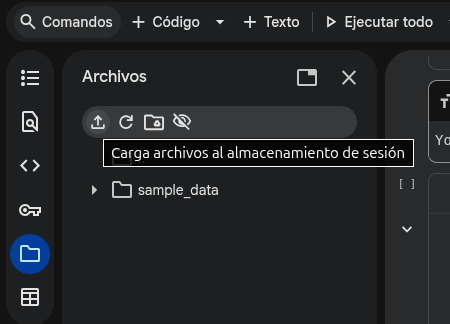

O podés descargarlos con `wget`, `uvx yt-dlp`, etc.

Probemos un ejemplo. Es un episodio antiguo del programa radial más icónico de Argentina, "La Venganza será terrible" de Alejandro Dolina.

In [7]:
!wget https://venganzasdelpasado.com.ar/2009/12/dol0912111.mp3

--2025-12-03 11:56:16--  https://venganzasdelpasado.com.ar/2009/12/dol0912111.mp3
Resolving venganzasdelpasado.com.ar (venganzasdelpasado.com.ar)... 104.21.8.196, 172.67.157.212, 2606:4700:3032::6815:8c4, ...
Connecting to venganzasdelpasado.com.ar (venganzasdelpasado.com.ar)|104.21.8.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4053844 (3.9M) [audio/mpeg]
Saving to: ‘dol0912111.mp3’

dol0912111.mp3      100%[===================>]   3.87M  6.08MB/s    in 0.6s    

2025-12-03 11:56:17 (6.08 MB/s) - ‘dol0912111.mp3’ saved [4053844/4053844]



Uso básico de WhisperX

In [8]:
!uv run whisperx  dol0912111.mp3  --language es  --output_format txt

/content/.venv/lib/python3.12/site-packages/pyannote/database/util.py:182: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",
/content/.venv/lib/python3.12/site-packages/pyannote/database/util.py:216: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",
/content/.venv/lib/python3.12/site-packages/pyannote/database/util.py:253: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",
/content/.venv/lib/python3.12/site-packages/pyannote/database/util.py:284: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file_uem, names=names, dtype=dtype, sep="\s+")
/content/.venv/lib/python3.12/site-packages/pyannote/database/util.py:309: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(path, names=names, dtype=dtype, sep="\s+")
/content/.venv/lib/python3.12/site-packages/pyannote/database/loader.py:93: SyntaxWarning: invalid escape sequence '\s'
  file_trial, sep="\s+", names=["reference", "uri1", "uri2"]
/content/.venv/lib/python3.12/site-packages/pyannote/

El resultado tiene el mismo nombre que el archivo original

In [9]:
!cat dol0912111.txt

Hablaremos de Darwin y el origen de las especies.
A mí hay dos libros que me han gustado mucho siempre.
El origen de las especias y el camino de las especies.
Bien, empezaremos con el abuelo de Darwin, a quien Darwin no llegó a conocer, pero que debió influir seguramente en él.
Entonces se preguntarán cómo puede influir
una persona que no llegamos a conocer bueno parece que escribió libros este hombre el abuelo se llamaba Erasmus Darwin era médico amante de la poesía arcaica y clasicista pero en política era un impetuoso jacobino y esta combinación suele darse amantes de las letras clásicas que son jacobinos en política yo en la argentina no conozco absolutamente a nadie pero es una conversación que suele darse
Más bien la combinación usual es personas que odian a las letras clásicas pero en cambio son conservadores en política.
Esa es una combinación más usual.
Muy bien, me ha causado muchísima gracia esta observación.
No, pero está bien.
Justamente por lo que acabo de decir.
Bien, si

Pero WhisperX puede mucho más. Podemos usar un modelo más grande (y más preciso), mejorar las marcas de tiempo (alineación) y hacer detección de locutores (diarización).

Para usar diarización necesitamos modelos adicionales de HuggingFace, que requieren un token.

Iniciá sesión o registrate, después andá a https://huggingface.co/settings/tokens y creá un token con permiso de "read".

Luego asegurate de aceptar los términos del modelo en:
https://huggingface.co/pyannote/segmentation-3.0

In [10]:
# Ensure you agree the model terms at https://huggingface.co/pyannote/segmentation-3.0
from getpass import getpass
hf_token = getpass()

··········


Volvé a ejecutar WhisperX

In [11]:
!uv run whisperx dol0912111.mp3 --language es --hf_token {hf_token} --diarize  --model large-v2 --align_model WAV2VEC2_ASR_LARGE_LV60K_960H

/content/.venv/lib/python3.12/site-packages/pyannote/audio/core/io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()
/content/.venv/lib/python3.12/site-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be re

Esta vez no especificamos ningún formato, así que se generaron todos: .json, .srt, .txt, .vtt, etc. Por ejemplo, así se ve el archivo .srt

In [12]:
!head dol0912111.srt

1
00:00:00,115 --> 00:00:05,500
[SPEAKER_01]: Hablaremos de Darwin y el origen de las especies.

2
00:00:05,520 --> 00:00:09,384
[SPEAKER_01]: A mí hay dos libros que me han gustado mucho siempre.

3
00:00:09,404 --> 00:00:13,307


La salida más completa es el `.json`, que trae alineación a nivel de palabra e información de los oradores

In [13]:
!cat dol0912111.json

{"segments": [{"start": 0.115, "end": 5.5, "text": " Hablaremos de Darwin y el origen de las especies.", "words": [{"word": "Hablaremos", "start": 0.115, "end": 1.076, "score": 0.73, "speaker": "SPEAKER_01"}, {"word": "de", "start": 1.316, "end": 1.837, "score": 0.886, "speaker": "SPEAKER_01"}, {"word": "Darwin", "start": 2.157, "end": 2.717, "score": 0.919, "speaker": "SPEAKER_01"}, {"word": "y", "start": 3.338, "end": 3.498, "score": 0.754, "speaker": "SPEAKER_01"}, {"word": "el", "start": 3.518, "end": 3.578, "score": 0.736, "speaker": "SPEAKER_01"}, {"word": "origen", "start": 3.598, "end": 4.119, "score": 0.837, "speaker": "SPEAKER_01"}, {"word": "de", "start": 4.219, "end": 4.319, "score": 0.89, "speaker": "SPEAKER_01"}, {"word": "las", "start": 4.359, "end": 4.579, "score": 0.782, "speaker": "SPEAKER_01"}, {"word": "especies.", "start": 4.599, "end": 5.5, "score": 0.858, "speaker": "SPEAKER_01"}], "speaker": "SPEAKER_01"}, {"start": 5.52, "end": 9.384, "text": "A mí hay dos libr

Con este archivo como fuente podemos generar un texto que incluya las etiquetas de cada hablante

In [14]:
import json
from pathlib import Path

def dialog(path):
  p = Path(path)
  data = json.loads(p.read_text())
  result = []
  current_speaker = None
  for s in data["segments"]:
    speaker = s["speaker"]
    if speaker != current_speaker:
      current_speaker = speaker
      result.append(f"\n\n{speaker}:")
    result.append(s["text"].strip())
  return "\n".join(result)

print(dialog("dol0912111.json"))



SPEAKER_01:
Hablaremos de Darwin y el origen de las especies.
A mí hay dos libros que me han gustado mucho siempre.
El origen de las especies y el camino de las especies.
Bien.
Empezaremos con el abuelo de Darwin, a quien Darwin no llegó a conocer, pero que debió influir seguramente en él.
Ustedes se preguntarán, ¿cómo puede influir?
una persona que no llegamos a conocer.
Bueno, parece que escribió libros este hombre, el abuelo.
Se llamaba Erasmus Darwin, era médico, amante de la poesía arcaica y clasicista, pero en política era un impetuoso jacobino.
Y esta combinación suele darse, amantes de las letras clásicas que son jacobinos en política.
Yo en la Argentina no conozco absolutamente a nadie, pero es una conversación que suele darse.
Más bien, la combinación usual es personas que odian a las letras clásicas pero en cambio son conservadores en política.
Esa es una combinación más usual.
Muy bien, me ha causado muchísima gracia esta observación.
No, pero... Justamente por lo que aca

O algo más elaborado que incluya marcas de tiempo cada algunas oraciones

In [15]:
def format_timestamp(seconds: float) -> str:
    """Return a timestamp like HH:MM:SS.mmm from seconds."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = seconds % 60
    return f"{hours:02d}:{minutes:02d}:{secs:06.3f}"


def dialog_with_timestamps(path: str, sentence_interval: int = 5) -> str:
    """
    Build a dialog from a WhisperX JSON file, adding timestamps:
    - whenever a new speaker starts
    - and every `sentence_interval` segments.

    Text after the timestamp is indented so wrapped lines align nicely.
    """
    p = Path(path)
    data = json.loads(p.read_text())

    result: list[str] = []
    current_speaker: str | None = None
    sentences_since_timestamp = 0

    # Fixed width to align text for lines without explicit timestamp
    # "[00:00:00.000]  " → length 15
    base_indent_width = len("[00:00:00.000]  ")

    for segment in data["segments"]:
        # Try to get the speaker either from the segment or from the first word
        speaker = segment.get("speaker")
        if speaker is None:
            words = segment.get("words") or []
            if words:
                speaker = words[0].get("speaker")

        segment_start = float(segment["start"])
        text = segment["text"].strip()

        new_speaker = speaker != current_speaker

        if new_speaker:
            current_speaker = speaker
            # Speaker header line
            result.append(f"\n\n{speaker}:")
            sentences_since_timestamp = 0

        # Decide if this segment needs an explicit timestamp line
        needs_timestamp = new_speaker or sentences_since_timestamp >= sentence_interval

        if needs_timestamp:
            ts = format_timestamp(segment_start)
            prefix = f"[{ts}]  "
            indent_width = len(prefix)
            sentences_since_timestamp = 1  # reset after a timestamp
        else:
            # No timestamp, but we still align the text where it would start
            prefix = ""
            indent_width = base_indent_width
            sentences_since_timestamp += 1

        # Split in case there are embedded newlines (optional)
        lines = text.splitlines() or [""]
        formatted_lines: list[str] = []

        if needs_timestamp:
            # First line carries the timestamp
            formatted_lines.append(prefix + lines[0])
        else:
            # First line is just indented to align with text column
            formatted_lines.append(" " * indent_width + lines[0])

        # Subsequent lines: same indent, no repeated timestamp
        for extra in lines[1:]:
            formatted_lines.append(" " * indent_width + extra)

        result.extend(formatted_lines)

    return "\n".join(result)


print(dialog_with_timestamps("dol0912111.json"))



SPEAKER_01:
[00:00:00.115]  Hablaremos de Darwin y el origen de las especies.
                A mí hay dos libros que me han gustado mucho siempre.
                El origen de las especies y el camino de las especies.
                Bien.
                Empezaremos con el abuelo de Darwin, a quien Darwin no llegó a conocer, pero que debió influir seguramente en él.
[00:00:25.278]  Ustedes se preguntarán, ¿cómo puede influir?
                una persona que no llegamos a conocer.
                Bueno, parece que escribió libros este hombre, el abuelo.
                Se llamaba Erasmus Darwin, era médico, amante de la poesía arcaica y clasicista, pero en política era un impetuoso jacobino.
                Y esta combinación suele darse, amantes de las letras clásicas que son jacobinos en política.
[00:00:49.967]  Yo en la Argentina no conozco absolutamente a nadie, pero es una conversación que suele darse.
                Más bien, la combinación usual es personas que odian a las 

## Probalo vos

Este tutorial te guió por los pasos necesarios para usar WhisperX en Google Colab. Ahora te toca experimentar con tus propios audios y explorar todo lo que ofrece esta herramienta poderosa.

Podés acceder al notebook original en Google Colab acá: https://colab.research.google.com/drive/1RTCV4Ryfe73xEbvYR6AlZpGrPR5FYAd3?usp=sharing

¡Felices transcripciones!